<a href="https://colab.research.google.com/github/Songlahaha/tensor/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds    # 導入tensorflow官方的資料集

# 載入資料

In [2]:
dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=True, split=["train"])    # 載入資料集

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteJCODRU/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path=PosixGPath('/tmp/tmpc5psnsl4tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},

In [ ]:
for data in dataset["train"].take(1):
  print(data)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


# 資料集切割

In [3]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset, val_dataset, test_dataset

In [4]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
# print(list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator()))

Dataset 視圖化

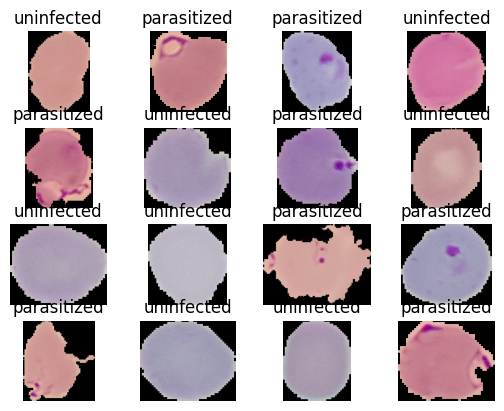

In [ ]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.title(dataset_info.features["label"].int2str(label))
  plt.axis("off")
  plt.imshow(image)

使Map進行預處理
tf.image.resize(image, (IM_SIZE, IM_SIZE)) 將圖像調整為指定的大小 (IM_SIZE, IM_SIZE)。這將確保所有的圖像都有相同的大小，以符合模型的輸入要求。

接著，/255. 對調整大小後的圖像進行了歸一化處理。除以 255 的目的是將像素值縮放到 0 到 1 的範圍內，以確保圖像的像素值符合模型的期望輸入範圍。

In [5]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [6]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

In [ ]:
for image, label in train_dataset.take(1):
  print(image, label)


tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


# 打亂資料, batch大小設定

In [7]:
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [8]:
val_dataset = val_dataset.shuffle(buffer_size=32, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

不錯的CNN概念網站
https://poloclub.github.io/cnn-explainer/

# 建立Model

In [9]:
from tensorflow.keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten, BatchNormalization
# model = tf.keras.Sequential([
#     InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

#     # 建立filter , 第一層
#     Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
#     BatchNormalization(),
#     MaxPool2D(pool_size=2, strides=2),

#     # 建立filter , 第二層
#     Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
#     BatchNormalization(),
#     MaxPool2D(pool_size=2, strides=2),

#     # 攤平資料, 並建立輸出
#     Flatten(),

#     Dense(100, activation='relu'),
#     BatchNormalization(),

#     Dense(10, activation='relu'),
#     BatchNormalization(),

#     Dense(1, activation='sigmoid'),

# ])

In [15]:
from keras.optimizers import Adam
from keras.engine.training import optimizer
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
# model.compile(
#     optimizer = Adam(learning_rate=0.01),
#     loss = BinaryCrossentropy(),
#     metrics= ['acc']
# )

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 82s 71ms/step - loss: 0.3666 - acc: 0.8367 - val_loss: 0.3638 - val_acc: 0.9009
Epoch 2/20
689/689 [==============================] - 53s 77ms/step - loss: 0.2097 - acc: 0.9287 - val_loss: 0.6756 - val_acc: 0.8512
Epoch 3/20
689/689 [==============================] - 49s 70ms/step - loss: 0.2022 - acc: 0.9326 - val_loss: 0.1870 - val_acc: 0.9485
Epoch 4/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1832 - acc: 0.9365 - val_loss: 0.2035 - val_acc: 0.9412
Epoch 5/20
689/689 [==============================] - 49s 71ms/step - loss: 0.1650 - acc: 0.9441 - val_loss: 0.1814 - val_acc: 0.9405
Epoch 6/20
689/689 [==============================] - 55s 80ms/step - loss: 0.1566 - acc: 0.9470 - val_loss: 0.4048 - val_acc: 0.8011
Epoch 7/20
689/689 [==============================] - 48s 70ms/step - loss: 0.1710 - acc: 0.9404 - val_loss: 0.2739 - val_acc: 0.9452
Epoch 8/20
689/689 [==============================] - 52s 75ms

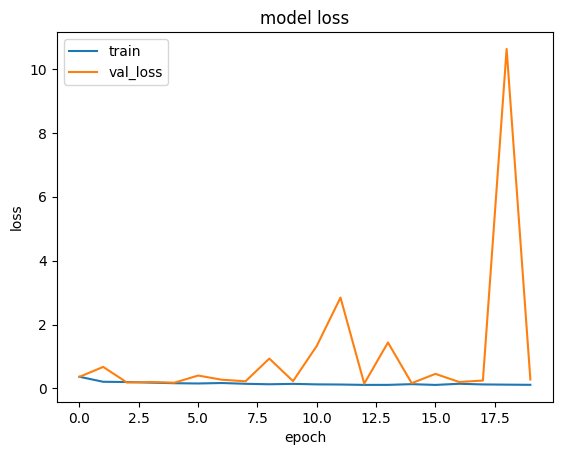

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["train",'val_loss'])
plt.show()

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 16s 49ms/step - loss: 0.6945 - acc: 0.4904


[0.6945397257804871, 0.49038809537887573]

當x大於0.5時就代表被感染的機率大 , 所以顯示P
當小於0.5時就代表被感染的機率小 , 就顯示U
因為sigmoid輸出後是兩個結果相加等於1 , 也就是說可以當成機率來觀察
1就是100%

In [ ]:
def parasite_or_not(x):
  if (x<0.5):
    return str("P")
  else:
    return str("U")

In [ ]:
parasite_or_not(model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 14s 14s/step


'P'

1/1 [==============================] - 12s 12s/step


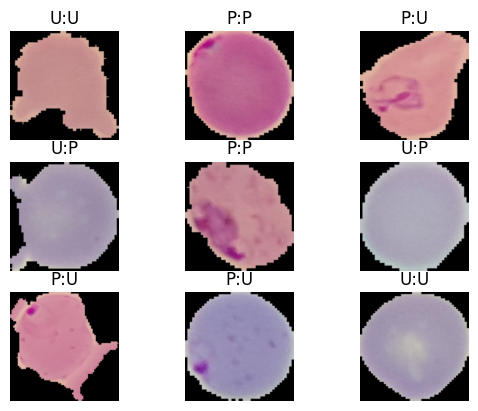

In [ ]:
for i, (image, label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(test_dataset.take(1))[0][0])))
  plt.axis("off")

# 儲存Model的訓練結果

In [19]:
lenet_sub_classed.save("SaveLLeNetModel")

加載Model

In [ ]:
new_model = tf.keras.models.load_model("SaveModel")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

用載入的New Model進行預測

In [ ]:
parasite_or_not(new_model.predict(test_dataset.take(1))[0])

1/1 [==============================] - 13s 13s/step


'P'

In [ ]:
model.save("SaveModel_hdf5.hdf5")

In [ ]:
new_model_hdf5 = tf.keras.models.load_model("SaveModel")
new_model_hdf5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [ ]:
parasite_or_not(new_model_hdf5.predict(test_dataset.take(1))[0])

1/1 [==============================] - 12s 12s/step


'U'

只保存權重

In [ ]:
model.save_weights("weight/model_weight")

In [ ]:
# 測試model前後對比

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    # 建立filter , 第一層
    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 建立filter , 第二層
    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    # 攤平資料, 並建立輸出
    Flatten(),

    Dense(1000, activation='relu'),
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='sigmoid'),

])

model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 18s 38ms/step - loss: 0.6941 - acc: 0.4770


[0.6941472887992859, 0.4769677221775055]

In [ ]:
model_weight = model.load_weights("./weight/model_weight")      # 載入權重

In [ ]:
model.evaluate(test_dataset)

87/87 [==============================] - 17s 49ms/step - loss: 0.2908 - acc: 0.9162


[0.29080498218536377, 0.9162132740020752]

儲存到google drive

In [20]:
from google.colab import drive

In [21]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [22]:
!cp -r /content/SaveLLeNetModel/ /content/drive/MyDrive/model/Malaria/

In [ ]:
# 從之前儲存的路徑複製回到colab裡面

In [ ]:
!cp -r /content/drive/MyDrive/路徑/ /content/

Functional API

# Functional API 常用來特徵提取, 上面跟下面的差別就是,特徵提取的話不需要最後面的輸出, 此部分為理解部分

In [ ]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

x = Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu")(func_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=2, strides=2)(x)

    # 建立filter , 第二層, 最後output提取特徵
x = Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu")(x)
x = BatchNormalization()(x)
output = MaxPool2D(pool_size=2, strides=2)(x)

    # 不需要建立輸出
# x = Flatten()(x)

# x = Dense(1000, activation='relu')(x)
# x = BatchNormalization()(x)

# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)

# func_output = Dense(1, activation='sigmoid')(x)

feature_model = Model(func_input, output, name="Feature_Extractor")

feature_model.summary()


Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16

In [ ]:
# func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

# x = Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu")(func_input)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)

#     # 建立filter , 第二層
# x = Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu")(x)
# x = BatchNormalization()(x)
# x = MaxPool2D(pool_size=2, strides=2)(x)

#     # 攤平資料, 並建立輸出
# x = Flatten()(x)

# x = Dense(1000, activation='relu')(x)
# x = BatchNormalization()(x)

# x = Dense(100, activation='relu')(x)
# x = BatchNormalization()(x)

# func_output = Dense(1, activation='sigmoid')(x)

# model_func = Model(func_input, func_output, name="LeNetModel")

# model_func.summary()


Model: "LeNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_16 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_17 (Bat  (None, 109, 109, 16)     6

取完特徵後丟到別的Model裡面進行訓練

In [ ]:
func_input = Input(shape=(IM_SIZE,IM_SIZE,3), name="InputImage")

x = feature_model(func_input)     # 調用上面的feature_model特徵提取演算法

x = Flatten()(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation='relu')(x)
x = BatchNormalization()(x)

func_output = Dense(1, activation="sigmoid")(x)

model_func = Model(func_input, func_output, name="LeNet_Model")

model_func.summary()

Model: "LeNet_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputImage (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Function  (None, 54, 54, 16)       1136      
 al)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               4665700   
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                

Model Subclassing
小Model, 提供調用

池化層的概念就是通過保留圖像或特徵圖的重要特徵，同時將其他不太重要的細節變得模糊或降低其影響力。

# **Funtional API 重點**

In [10]:
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size):
    # 建構特徵提取的模型
    super(FeatureExtractor, self).__init__()     ## 呼叫自己, 確保被初始化 ##
    self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=pool_size, strides=strides*2)

    self.conv_2 = Conv2D(filters=filters*2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation)
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=pool_size, strides=strides*2)


  def call(self, x, training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)

    return x

# 使用提取特徵模型
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

In [11]:
# 上面是建立特徵提取Model, 這邊要建立訓練模型

class LeNetModel(Model):
  def __init__(self,):
    super(LeNetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2)

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu')
    self.batch_1 = BatchNormalization()

    self.dense_2 = Dense(10, activation='relu')
    self.batch_2 = BatchNormalization()

    self.dense_3 = Dense(1, activation="sigmoid")

  def call(self, x, training):
    x = self.feature_extractor(x)

    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dense_3(x)

    return x

lenet_sub_classed = LeNetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))      # 隨便建立一個tensor來進行model的測試
lenet_sub_classed.summary()


Model: "le_net_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_1 (Featur  multiple                 1488      
 eExtractor)                                                     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  4665700   
                                                                 
 batch_normalization_4 (Batc  multiple                 400       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             multiple                  1010      
                                                                 
 batch_normalization_5 (Batc  multiple                

In [ ]:
# lenet_sub_classed.compile(
#     optimizer = Adam(learning_rate=0.01),
#     loss = BinaryCrossentropy(),
#     metrics = "accuracy"
# )

In [ ]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=75, verbose=1)

Epoch 1/75
307/689 [============>.................] - ETA: 23s - loss: 0.4521 - accuracy: 0.7839

KeyboardInterrupt: ignored

# 自定義層

*   對於大多數情況下，我們希望訓練模型時更新所有層的權重，因此 trainable=True 是預設值。這使得模型能夠學習從輸入到輸出之間的最佳權重配置，以最小化損失函數。


*   有時候，我們可能想要凍結某些層或某些參數，即不對它們進行訓練。這可以通過將 trainable=False 來實現。凍結層或參數意味著在訓練過程中不更新它們的權重，保持它們的初始值。這在一些情況下很有用，例如在遷移學習中，我們可能想要固定某些預訓練模型的權重，只訓練新添加的層。

*   initializer="random_normal" 是一種初始化方法的選擇, "random_normal" 初始化器中，它根據正態分佈（高斯分佈）生成具有指定均值和標準差的隨機數值作為初始值, 一般沒有設定的情況下都是用"Glorot uniform", biases則是0, 而不是"random_normal"

*   tf.nn.relu() 和 Dense(100, activation='relu') 中的 activation='relu' 是相同的意思，都是指定修正線性單元（ReLU）作為激活函數, 下面的sigmoid同樣意思, 由於是自定義層 , 所以這個要自己定義
*   self.weights 屬性會與 Layer 父類中的只讀屬性名稱衝突，所以不能使用 self.weights 來命名權重變數, 故使用self.w





In [ ]:
# 可以建立自己的Dense
class NeuralearnDense(Layer):
  def __init__(self, output_units, activation):
    super(NeuralearnDense, self).__init__()

    self.output_units = output_units
    self.activation = activation

  def build(self, input_feature_shape):
    self.w = self.add_weight(shape=(input_feature_shape[-1], self.output_units), initializer="random_normal", trainable=True)    # 設定初始權重, 取最後一個是因為最後一個維度是特徵的總數
    self.b = self.add_weight(shape=(self.output_units, ), initializer="random_normal", trainable=True)        # 設定初始偏差值


  def call(self, input_features):
    pred_output = tf.matmul(input_features, self.w) + self.b
    if (self.activation == "relu"):
      return tf.nn.relu(pred_output)
    elif (self.activation == "sigmoid"):
      return tf.math.sigmoid(pred_output)
    else:
      return pred_output




In [ ]:
new_custom_model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters=6, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=3, strides=1, padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    NeuralearnDense(100, activation='relu'),      # 這邊改成剛剛上面建立的NeuralearnDense
    BatchNormalization(),

    NeuralearnDense(10, activation='relu'),      # 這邊改成剛剛上面建立的NeuralearnDense
    BatchNormalization(),

    NeuralearnDense(1, activation='sigmoid'),      # 這邊改成剛剛上面建立的NeuralearnDense

])

new_custom_model.summary()
new_custom_model.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics= ['acc']
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_48 (Bat  (None, 222, 222, 6)      24        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 6)      0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_49 (Bat  (None, 109, 109, 16)     64        
 chNormalization)                                                
                                                      

In [ ]:
history = new_custom_model.fit(train_dataset, validation_data=val_dataset, epochs=5, verbose=1)

Epoch 1/5
 47/689 [=>............................] - ETA: 8:49 - loss: 0.6730 - acc: 0.5731

KeyboardInterrupt: ignored

# 最佳閥值與其他衡量模型的精確指標

Model Training, 評估模型性能的指標

假設我們有一個二元分類模型，用於預測人們是否患有某種疾病。我們將患有該疾病的情況定義為正例，未患有該疾病的情況定義為負例。在這種情況下，我們可以使用以下術語和示例來解釋:

*   True Positives（真正例）：這是指模型正確預測出的正例數量。也就是說，模型將患有該疾病的人預測為正例。
例如，模型正確預測了有疾病的 50 人，這些人確實患有該疾病，則這 50 人屬於真正例。
*   False Positives（假正例）：這是指模型錯誤地將負例預測為正例的數量。也就是說，模型將未患有該疾病的人預測為正例。
例如，模型錯誤地將未患有該疾病的 20 人預測為患病，則這 20 人屬於假正例。

*   True Negatives（真負例）：這是指模型正確預測出的負例數量。也就是說，模型將未患有該疾病的人預測為負例。
例如，模型正確預測了未患有該疾病的 300 人，這些人確實未患有該疾病，則這 300 人屬於真負例。
*   False Negatives（假負例）：這是指模型錯誤地將正例預測為負例的數量。也就是說，模型將患有該疾病的人預測為負例。
例如，模型錯誤地將患有該疾病的 30 人預測為未患病，則這 30 人屬於假負例。



*   對於某些應用場景，特別是在醫學領域或其他需要高召回率的情況下，Recall（召回率）是一個重要的指標。在這些情況下，我們希望能夠盡可能地檢測出正確的實際正例，即盡可能減少 False Negatives（假負例），以降低遺漏重要信息的風險。(注重FN)
*   另一方面，對於某些場景，例如垃圾郵件檢測或金融詐騙檢測等，我們可能更關注 Precision（精確率）。在這些情況下，我們希望減少 False Positives（假正例），即減少將負例錯誤地分類為正例的情況。這可以幫助我們減少虛假報警和不必要的後續處理。(注重FP)



*   閥值（threshold）來調整預測結果的類別。預測概率或分數超過閥值的樣本被分類為正例，而低於閥值的樣本則被分類為負例
*   ROC 曲線和 AUC：接收者操作特徵曲線（Receiver Operating Characteristic Curve，ROC Curve）是根據不同閥值計算模型的 True Positive Rate（召回率）和 False Positive Rate（假正例率）而繪製的曲線。ROC 曲線下的面積（Area Under the ROC Curve，AUC）是衡量模型整體分類能力的指標，AUC 值越大表示模型在不同閥值下的性能越好。ROC曲線越靠近右上方越好，因此，ROC曲線下的面積越大越好，代表模型的效益越高。













In [12]:
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
metrics = [TruePositives(name="tp"), FalsePositives(name='fp'), TrueNegatives(name="tn"), FalseNegatives(name='fn'), BinaryAccuracy(name='acc'), Precision(name="precision"), Recall(name='recall'), AUC(name='auc')]


In [16]:
lenet_sub_classed.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics = metrics
)

In [18]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 15s 21ms/step - loss: 0.1858 - tp: 10464.0000 - fp: 810.0000 - tn: 10211.0000 - fn: 561.0000 - acc: 0.9378 - precision: 0.9282 - recall: 0.9491 - auc: 0.9749 - val_loss: 0.1779 - val_tp: 1350.0000 - val_fp: 130.0000 - val_tn: 1236.0000 - val_fn: 39.0000 - val_acc: 0.9387 - val_precision: 0.9122 - val_recall: 0.9719 - val_auc: 0.9813
Epoch 2/20
689/689 [==============================] - 15s 21ms/step - loss: 0.1751 - tp: 10505.0000 - fp: 813.0000 - tn: 10210.0000 - fn: 518.0000 - acc: 0.9396 - precision: 0.9282 - recall: 0.9530 - auc: 0.9772 - val_loss: 0.1609 - val_tp: 1366.0000 - val_fp: 120.0000 - val_tn: 1238.0000 - val_fn: 31.0000 - val_acc: 0.9452 - val_precision: 0.9192 - val_recall: 0.9778 - val_auc: 0.9824
Epoch 3/20
689/689 [==============================] - 15s 21ms/step - loss: 0.1700 - tp: 10536.0000 - fp: 772.0000 - tn: 10249.0000 - fn: 489.0000 - acc: 0.9428 - precision: 0.9317 - recall: 0.9556 - auc: 0.9783 - val_loss

In [23]:
lenet_sub_classed.evaluate(train_dataset)

689/689 [==============================] - 7s 10ms/step - loss: 0.0528 - tp: 10996.0000 - fp: 433.0000 - tn: 10590.0000 - fn: 27.0000 - acc: 0.9791 - precision: 0.9621 - recall: 0.9976 - auc: 0.9989


[0.0527912974357605,
 10996.0,
 433.0,
 10590.0,
 27.0,
 0.9791345596313477,
 0.9621139168739319,
 0.9975505471229553,
 0.9989179372787476]

將剛剛的數據繪圖

In [24]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

In [25]:
labels = []
inp = []
for x, y in test_dataset.as_numpy_iterator():
  labels.append(y)
  inp.append(x)

In [26]:
# 將labels中的數據做處理, 變成可用的數據
labels = np.array([i for i in labels])
print(labels)

[1 1 1 ... 1 1 0]


In [27]:
print(np.array(inp).shape)

(2757, 224, 224, 3)


print(predicted.shape)可以發現是(2757, 1), 表示有2757筆資料, 然後有1個column, 就是預測的值, 現在要拿這個值跟labels的答案labels比對

In [28]:
predicted = lenet_sub_classed.predict(np.array(inp))
print(predicted[:,0])
print(predicted.shape)

87/87 [==============================] - 1s 8ms/step
[9.7702026e-01 9.9999428e-01 9.9999440e-01 ... 9.9561751e-01 9.9964499e-01
 2.1341879e-05]
(2757, 1)


閥值

In [34]:
threshold = 0.915
cm = confusion_matrix(labels, predicted > threshold)
print(cm)

[[1299   94]
 [ 110 1254]]


Text(0.5, 58.7222222222222, 'Predicted')

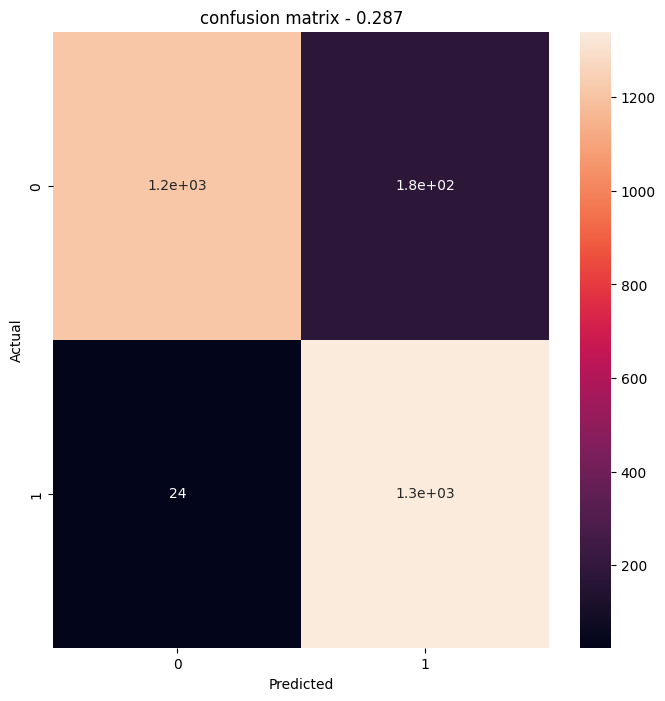

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True)
plt.title("confusion matrix - {}".format((threshold)))
plt.ylabel("Actual")
plt.xlabel("Predicted")

製作ROC曲線

In [35]:
from sklearn.metrics import roc_curve

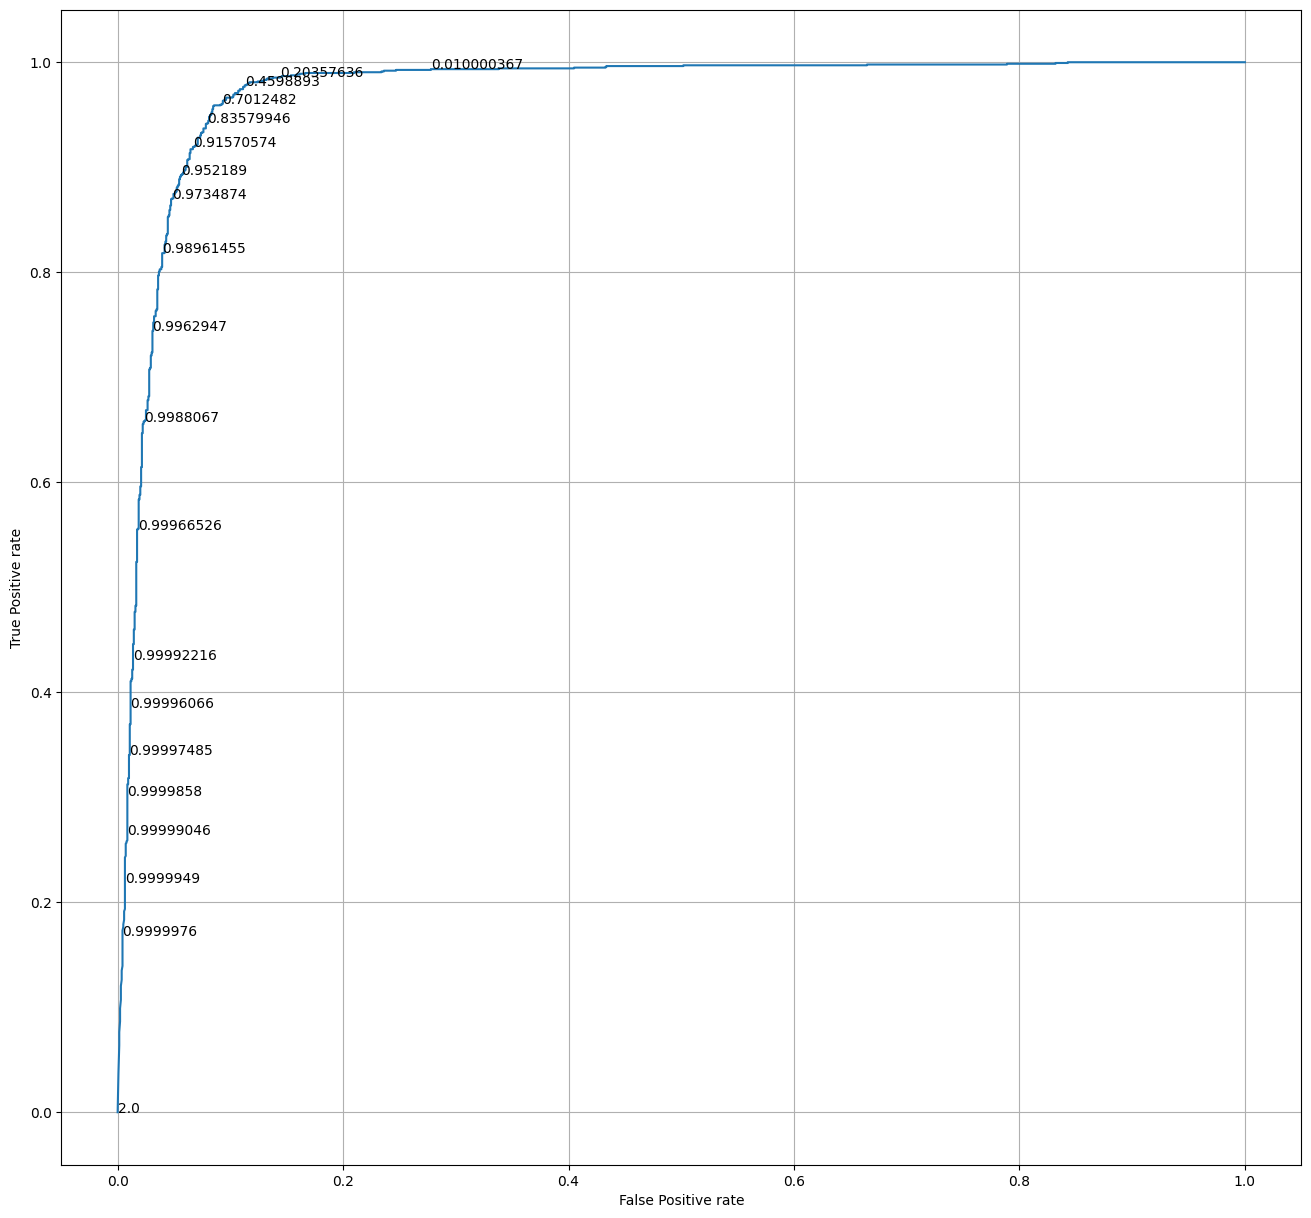

In [32]:
fp, tp, thresholds = roc_curve(labels, predicted)
plt.figure(figsize=(16, 15))
plt.plot(fp, tp)
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

plt.grid()

skip = 20
for i in range(0, len(thresholds), skip):
  plt.text(fp[i], tp[i], thresholds[i])

plt.show()

# Callbacks













*   Callbacks 在深度學習中是用於在訓練過程中執行特定操作的工具。它們可以在每個訓練批次或每個訓練週期之後觸發某些動作，例如記錄訓練指標、保存模型、動態調整學習率等。
*   使用 Callbacks 可以在訓練過程中監控模型的性能並根據需要進行操作。常見的 Callbacks 包括：

1.   ModelCheckpoint：在每個訓練週期結束時保存模型的檢查點。
2.   TensorBoard：將訓練過程中的指標和可視化結果記錄到 TensorBoard 中，用於後續分析和可視化。

1.   EarlyStopping：當模型在訓練過程中不再改善時，提前結束訓練。
2.   LearningRateScheduler：動態調整學習率，根據訓練過程中的指標變化來調整學習率。

1.   ReduceLROnPlateau：當指標停止改善時，降低學習率。











In [49]:
from keras import callbacks
from tensorflow.keras.callbacks import Callback, CSVLogger, EarlyStopping

在 on_epoch_end 方法中，它使用 logs 參數來獲取當前訓練週期的訓練指標，並透過 logs["loss"] 獲取損失值。然後，它使用 format 函數將訓練週期和損失值結合起來輸出。這樣可以在每個訓練週期結束時得到該週期的損失值並進行打印，以便在訓練過程中監控模型的訓練進度。



In [42]:
class LossCallBack(Callback):
  def on_epoch_end(self, epoch, logs):
    print("\n Epoch Number {} the model has a loss of {}".format(epoch+1, logs["loss"]))

  def on_batch_end(self, batch, logs):
    print("\n Batch Number {} the model has a lot of {}".format(batch+1, logs))


In [43]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[LossCallBack()])


 Batch Number 1 the model has a lot of {'loss': 0.015032466500997543, 'tp': 18.0, 'fp': 0.0, 'tn': 14.0, 'fn': 0.0, 'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'auc': 1.0}
  1/689 [..............................] - ETA: 7:41 - loss: 0.0150 - tp: 18.0000 - fp: 0.0000e+00 - tn: 14.0000 - fn: 0.0000e+00 - acc: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000
 Batch Number 2 the model has a lot of {'loss': 0.012982102110981941, 'tp': 31.0, 'fp': 0.0, 'tn': 33.0, 'fn': 0.0, 'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'auc': 1.0}

 Batch Number 3 the model has a lot of {'loss': 0.02613569237291813, 'tp': 44.0, 'fp': 1.0, 'tn': 51.0, 'fn': 0.0, 'acc': 0.9895833134651184, 'precision': 0.9777777791023254, 'recall': 1.0, 'auc': 0.9999999403953552}

 Batch Number 4 the model has a lot of {'loss': 0.021315479651093483, 'tp': 59.0, 'fp': 1.0, 'tn': 68.0, 'fn': 0.0, 'acc': 0.9921875, 'precision': 0.9833333492279053, 'recall': 1.0, 'auc': 0.9999999403953552}
  4/689 [.....................

In [44]:
# CSV Logger

*   append 參數用於指定是否將新的記錄附加到現有文件中。默認情況下，append 設置為 True，表示新記錄將被附加到現有文件的末尾。
*   如果將 append 設置為 False，則每次調用 CSVLogger 時都會創建一個新的文件，舊文件的內容將被覆蓋。



In [46]:
csv_callback = CSVLogger(
    'logs.csv', separator=',', append=False
)

In [48]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[csv_callback])


689/689 [==============================] - 14s 20ms/step - loss: 0.0355 - tp: 10926.0000 - fp: 171.0000 - tn: 10852.0000 - fn: 97.0000 - acc: 0.9878 - precision: 0.9846 - recall: 0.9912 - auc: 0.9988 - val_loss: 0.3571 - val_tp: 1220.0000 - val_fp: 88.0000 - val_tn: 1279.0000 - val_fn: 168.0000 - val_acc: 0.9071 - val_precision: 0.9327 - val_recall: 0.8790 - val_auc: 0.9611






*   baseline：你開始時的體重是80公斤，你將這個數值作為基準值（baseline）。現在你想要設定一個旗標，只有在你的體重低於這個基準值時才認為有進步。這樣，如果你的體重超過80公斤，即使它比前一週的體重更好，你仍然認為沒有達到目標。
*   min_delta：你希望每週至少減少1公斤的體重，這樣你才認為有足夠的改善。這樣一來，即使你的體重只減少幾百克，你仍然不滿足，因為它未達到你設定的最小改善閥值



In [67]:
es_callback = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0,
    mode="auto", baseline=None, restore_best_weights=False
)

In [48]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[csv_callback, es_callback])

# 學習率

In [51]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
scheduler_callback = LearningRateScheduler(scheduler, verbosity=1)

In [ ]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[scheduler_callback])


# CheckPoint

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [53]:
callback_check_point = ModelCheckpoint(
    filepath='check_points/',  # 模型權重的保存路徑
    monitor='val_loss',  # 監控的指標，這裡使用驗證集的損失函數值
    save_best_only=True,  # 只保存在驗證集上表現最好的模型權重
    save_weights_only=False,  # 只保存模型的權重，而不包括模型結構
    mode='auto',  # 監控指標的模式，這裡是自動取驗證集的損失函數值
    save_freq = 'epoch',
    verbose=1  # 顯示保存模型的信息
)

In [ ]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[callback_check_point])

# ReduceLROnPlateau








*   ReduceLROnPlateau 是一個回調函數，用於在訓練過程中根據模型在驗證集上的表現動態調整學習率。它的主要參數解釋如下：


1.   monitor：要監控的指標，這裡是驗證集的準確度。當指標觸發條件時，將調整學習率。
2.   factor：學習率的衰減因子。當指標停止改善時，學習率將乘以該因子。例如，如果 factor = 0.1，則學習率將以 0.1 的比例減少。

1.   patience：指標停止改善後的等待步數。如果在這個步數之後指標仍然沒有改善，則會調整學習率。

1.   verbose：控制是否輸出調整學習率的信息。








In [55]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [56]:
plateau_callack = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.1,
    patience = 2,
    verbose = 1
)

In [ ]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=1, verbose=1, callbacks=[plateau_callack])

# 過擬合 & 欠擬合













*   Dropout 是一種常用的正則化技術，用於減少深度學習模型的過擬合現象。在訓練過程中，Dropout 隨機將一些神經元的輸出設為 0，這樣可以強制模型去學習多個獨立的子模型，從而提高模型的泛化能力。Dropout 的作用如下：


1.   減少過擬合：Dropout 通過隨機關閉神經元的輸出，減少了神經元之間的相互依賴關係，從而減少了模型的過擬合現象。這樣模型在訓練集上的表現和在測試集上的表現更加一致。

1.   提高模型的泛化能力：由於 Dropout 強制模型學習多個獨立的子模型，每個子模型只能依賴部分神經元的輸出，這使得模型具有更強的泛化能力，能夠更好地處理新的未見數據。

1.   防止共適應：當模型中存在共適應現象時，神經元之間會出現過度相互依賴的情況，這可能導致模型無法很好地應對新的數據。Dropout 的使用可以打破這種共適應，強制模型學習獨立的特徵。
2.   需要注意的是，Dropout 只在訓練過程中應用，而在測試過程中是不使用 Dropout 的，這是因為在測試過程中，我們希望獲得模型的確定性預測結果。在實際應用中，通常會將 Dropout 的比例設置為 0.2 到 0.5 之間，具體的數值需要根據問題和數據集的特點進行調整。







In [76]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import L2

In [79]:
class FeatureExtractor(Layer):
  def __init__(self, filters, kernel_size, strides, padding, activation, pool_size, dropout_rating):
    # 建構特徵提取的模型
    super(FeatureExtractor, self).__init__()     ## 呼叫自己, 確保被初始化 ##
    self.conv_1 = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation, kernel_regularizer=L2(0.01))
    self.batch_1 = BatchNormalization()
    self.pool_1 = MaxPool2D(pool_size=pool_size, strides=strides*2)
    self.dropout_1 = Dropout(rate=dropout_rating)


    self.conv_2 = Conv2D(filters=filters*2, kernel_size=kernel_size, strides=strides, padding=padding, activation=activation, kernel_regularizer=L2(0.01))
    self.batch_2 = BatchNormalization()
    self.pool_2 = MaxPool2D(pool_size=pool_size, strides=strides*2)
    self.dropout_2 = Dropout(rate=dropout_rating)


  def call(self, x, training):
    x = self.conv_1(x)
    x = self.batch_1(x)
    x = self.pool_1(x)
    x = self.dropout_1(x)

    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.pool_2(x)
    x = self.dropout_2(x)

    return x

# 使用提取特徵模型
feature_sub_classed = FeatureExtractor(8, 3, 1, "valid", "relu", 2, 0.2)

In [80]:
# 上面是建立特徵提取Model, 這邊要建立訓練模型

class LeNetModel(Model):
  def __init__(self,):
    super(LeNetModel, self).__init__()

    self.feature_extractor = FeatureExtractor(8, 3, 1, "valid", "relu", 2, 0.2)

    self.flatten = Flatten()
    self.dense_1 = Dense(100, activation='relu',kernel_regularizer=L2(0.01))
    self.batch_1 = BatchNormalization()
    self.dropout_3= Dropout(rate=0.2)

    self.dense_2 = Dense(10, activation='relu',kernel_regularizer=L2(0.01))
    self.batch_2 = BatchNormalization()


    self.dense_3 = Dense(1, activation="sigmoid")

  def call(self, x, training):
    x = self.feature_extractor(x)

    x = self.flatten(x)
    x = self.dense_1(x)
    x = self.batch_1(x)
    x = self.dense_2(x)
    x = self.batch_2(x)
    x = self.dropout_3(x)
    x = self.dense_3(x)

    return x

lenet_sub_classed = LeNetModel()
lenet_sub_classed(tf.zeros([1,224,224,3]))      # 隨便建立一個tensor來進行model的測試
lenet_sub_classed.summary()


Model: "le_net_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_14 (Featu  multiple                 1488      
 reExtractor)                                                    
                                                                 
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_18 (Dense)            multiple                  4665700   
                                                                 
 batch_normalization_40 (Bat  multiple                 400       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        multiple                  0         
                                                                 
 dense_19 (Dense)            multiple               

In [64]:
lenet_sub_classed.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = BinaryCrossentropy(),
    metrics = metrics
)

In [68]:
history = lenet_sub_classed.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1, callbacks=[plateau_callack,es_callback])

Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 0.2220 - tp: 10368.0000 - fp: 1025.0000 - tn: 9998.0000 - fn: 655.0000 - acc: 0.9238 - precision: 0.9100 - recall: 0.9406 - auc: 0.9640

689/689 [==============================] - 17s 23ms/step - loss: 0.2220 - tp: 10368.0000 - fp: 1025.0000 - tn: 9998.0000 - fn: 655.0000 - acc: 0.9238 - precision: 0.9100 - recall: 0.9406 - auc: 0.9640 - val_loss: 0.1885 - val_tp: 1362.0000 - val_fp: 153.0000 - val_tn: 1210.0000 - val_fn: 30.0000 - val_acc: 0.9336 - val_precision: 0.8990 - val_recall: 0.9784 - val_auc: 0.9749 - lr: 0.0100
Epoch 2/20
688/689 [============================>.] - ETA: 0s - loss: 0.1973 - tp: 10469.0000 - fp: 845.0000 - tn: 10155.0000 - fn: 547.0000 - acc: 0.9368 - precision: 0.9253 - recall: 0.9503 - auc: 0.9701

689/689 [==============================] - 16s 22ms/step - loss: 0.1974 - tp: 10478.0000 - fp: 847.0000 - tn: 10174.0000 - fn: 547.0000 - acc: 0.9368 - precision: 0.9252 - recall: 0.9504 - auc: 0.9700 - val_loss: 0.2118 - val_tp: 1359.0000 - val_fp: 142.0000 - val_tn: 1221.0000 - val_fn: 33.0000 - val_acc: 0.9365 - val_precision: 0.9054 - val_recall: 0.9763 - val_auc: 0.9789 - lr: 0.0100
Epoch 3/20
688/689 [============================>.] - ETA: 0s - loss: 0.1797 - tp: 10484.0000 - fp: 787.0000 - tn: 10214.0000 - fn: 531.0000 - acc: 0.9401 - precision: 0.9302 - recall: 0.9518 - auc: 0.9756

689/689 [==============================] - 16s 22ms/step - loss: 0.1798 - tp: 10494.0000 - fp: 790.0000 - tn: 10231.0000 - fn: 531.0000 - acc: 0.9401 - precision: 0.9300 - recall: 0.9518 - auc: 0.9756 - val_loss: 0.2823 - val_tp: 1332.0000 - val_fp: 84.0000 - val_tn: 1283.0000 - val_fn: 56.0000 - val_acc: 0.9492 - val_precision: 0.9407 - val_recall: 0.9597 - val_auc: 0.9720 - lr: 0.0100
